### Instala primero la libreria de redes neuronales 

puedes ver información de la misma [aquí](https://pythonhosted.org/neurolab/)

In [4]:
!sudo /opt/anaconda/bin/pip install neurolab

The directory '/Users/rlx/Library/Caches/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
You are using pip version 7.0.3, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
The directory '/Users/rlx/Library/Caches/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Usamos el **wine quality** dataset del repositorio de datasets de la UCI [enlace](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

convertimos un problema multiclase en un problema de clasificación binaria

In [3]:
wine = np.loadtxt("data/winequality-white.csv", delimiter=";", skiprows=1)
datos = wine[:,:11]
calidad = wine[:,11]
print (wine.shape)
print (datos.shape)
print (calidad.shape)

for i in np.unique(calidad):
    print ("quality", i, "n=", np.sum(calidad==i))

calidad[calidad<=5]=-1
calidad[calidad>5]=1
print ("--")
for i in np.unique(calidad):
    print ("quality", i, "n=", np.sum(calidad==i))
    
print ("--")
print (np.mean(datos, axis=0) )   
print (np.std(datos, axis=0)  )  
print ("min datos", np.min(datos, axis=0))
print ("max datos", np.max(datos, axis=0))
    
from sklearn.preprocessing import scale, MinMaxScaler 
print ("--")
datos = MinMaxScaler().fit_transform(datos)
print ("min max datos columns")
print (np.min(datos, axis=0), np.max(datos, axis=0))

(4898, 12)
(4898, 11)
(4898,)
quality 3.0 n= 20
quality 4.0 n= 163
quality 5.0 n= 1457
quality 6.0 n= 2198
quality 7.0 n= 880
quality 8.0 n= 175
quality 9.0 n= 5
--
quality -1.0 n= 1640
quality 1.0 n= 3258
--
[6.85478767e+00 2.78241119e-01 3.34191507e-01 6.39141486e+00
 4.57723561e-02 3.53080849e+01 1.38360657e+02 9.94027376e-01
 3.18826664e+00 4.89846876e-01 1.05142670e+01]
[8.43782079e-01 1.00784259e-01 1.21007450e-01 5.07153999e+00
 2.18457377e-02 1.70054011e+01 4.24937260e+01 2.99060158e-03
 1.50985184e-01 1.14114183e-01 1.23049494e+00]
min datos [3.8000e+00 8.0000e-02 0.0000e+00 6.0000e-01 9.0000e-03 2.0000e+00
 9.0000e+00 9.8711e-01 2.7200e+00 2.2000e-01 8.0000e+00]
max datos [1.42000e+01 1.10000e+00 1.66000e+00 6.58000e+01 3.46000e-01 2.89000e+02
 4.40000e+02 1.03898e+00 3.82000e+00 1.08000e+00 1.42000e+01]
--
min max datos columns
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Definimos y entrenamos una red con dos capas intermedias y una neurona de salida

In [4]:
from sklearn import cross_validation
import neurolab as nl

limits = np.vstack((np.min(datos)*np.ones(datos.shape[1]), np.max(datos)*np.ones(datos.shape[1]))).T
test_size = 0.6

datos_train, datos_test, calidad_train, calidad_test = cross_validation.train_test_split(datos, 
                                                                     calidad, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
net = nl.net.newff(limits,[10, 1])
err = net.train(datos_train, calidad_train.reshape(len(calidad_train), 1), show=5, epochs=100)

Epoch: 5; Error: 830.0195282063216;
Epoch: 10; Error: 733.1268115824062;
Epoch: 15; Error: 654.1400823341983;
Epoch: 20; Error: 631.3176447632375;
Epoch: 25; Error: 620.8545167326796;
Epoch: 30; Error: 607.0599510641005;
Epoch: 35; Error: 592.987314358225;
Epoch: 40; Error: 577.7165857045186;
Epoch: 45; Error: 565.3092940158978;
Epoch: 50; Error: 555.9210315684848;
Epoch: 55; Error: 550.0143794187281;
Epoch: 60; Error: 546.7000432933794;
Epoch: 65; Error: 544.0752907226412;
Epoch: 70; Error: 541.8185505625432;
Epoch: 75; Error: 539.776338036775;
Epoch: 80; Error: 536.4775111770871;
Epoch: 85; Error: 533.1758104644387;
Epoch: 90; Error: 531.0217255945538;
Epoch: 95; Error: 530.2103366064925;
Epoch: 100; Error: 529.2577056389696;
The maximum number of train epochs is reached


Text(0,0.5,'error (default SSE)')

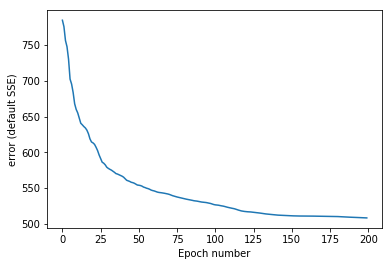

In [12]:
plt.plot(err)
plt.xlabel('Epoch number')
plt.ylabel('error (default SSE)')

### miramos el desempeño en el dataset de TEST

In [28]:
from sklearn.metrics import confusion_matrix

pred = net.sim(datos_test)[:,0]
pred[pred<0]=-1
pred[pred>0]=1

cm = confusion_matrix(calidad_test, pred)
print (cm)
print (np.sum(np.diag(cm))*1./np.sum(cm))

[[ 572  433]
 [ 282 1652]]
0.75671997278


### miramos el desempeño en el dataset de TRAIN

In [14]:
pred =  net.sim(datos_train)[:,0]
pred[pred<0]=-1
pred[pred>0]=1

cm = confusion_matrix(calidad_train, pred)
print (cm)
print (np.sum(np.diag(cm))*1./np.sum(cm))

[[ 456  204]
 [ 196 1103]]
0.795814190914


In [33]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
g.fit(datos_train, calidad_train)
predicciones_test  = g.predict(datos_test)
cm=confusion_matrix(calidad_test, predicciones_test)
print ("acierto en test ", g.score(datos_test, calidad_test))
print (cm)

acierto en test  0.69751616196
[[ 541  464]
 [ 425 1509]]
